In [2]:
from nltk.tokenize import TextTilingTokenizer
from matplotlib import pylab
from pylab import *
import matplotlib.pyplot as plt

import re
import pandas as pd 

from collections import Counter
import numpy as np
%matplotlib inline
import seaborn as sns; sns.set_theme()

import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS


In [3]:
###################
#Define a standard size for the next figures
###################
plt.rcParams["figure.figsize"] = (30,20)

In [5]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords))
print('First ten stop words: %s' % list(spacy_stopwords)[:305])

Number of stop words: 305
First ten stop words: ['own', 'whereafter', 'three', 'you', 'say', 'yourselves', 'even', 'together', 'becoming', 'nine', 'nothing', 'same', 'what', 'herself', 'through', 'about', 'ten', 'nevertheless', 'than', 'regarding', 'for', 'front', 'perhaps', 'see', 'hereby', 'make', 'onto', 'formerly', 'never', 'further', 'wherever', 'have', 'whom', 'fifteen', 'quite', 'eight', 'his', 'indeed', 'latter', 'her', 'otherwise', 'put', 're', 'again', 'i', 'thereby', 'yourself', 'himself', 'keep', 'none', 'any', 'both', 'until', 'seemed', 'bottom', 'anything', 'before', 'under', 'hereupon', 'due', 'serious', 'two', 'below', 'by', 'too', 'noone', 'afterwards', 'after', 'more', 'me', 'anyhow', 'beforehand', 'elsewhere', 'most', 'some', 'off', 'except', 'third', 'twenty', 'meanwhile', 'the', 'whatever', 'neither', 'on', 'empty', 'eleven', 'wherein', 'many', 'against', 'during', 'also', 'everyone', 'nobody', 'of', 'thence', 'per', 'mine', 'if', 'moreover', 'much', 'often', 'show

In [14]:
#######################
# Function to read a document
#######################
def download_file():
    #return requests.get("http://www.gutenberg.org/cache/epub/78/pg78.txt").text
    file = open("/Users/morganm/Documents/IATA/2020-11 Session_test_Novembre2020/test_doc_type_7_sujets/doc_test_7sujets.txt", "r")
    content = file.read()
    file.close()
    return content

In [15]:
# Count the occurences of word in the string 
#def word_count(str):
#    counts = dict()
#    words = str.split()
#    for word in words:
#        if word in counts:
#            counts[word] += 1
#        else:
#            counts[word] = 1
#    return counts


In [16]:
############################
# Create list of word tokens
# > Removing the special caracters
# > Lemmatization
#############################
regex = re.compile(r'[\n\r\t]')
def create_token_list(text):
    text = regex.sub("", text)
    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(text)
    token_list = []
    for token in my_doc:
        token_list.append(token.lemma_)
    return token_list

####################################
# Create list of word tokens after : 
#  > removing stopwords
#  > removing punctuation 
#  > Converting lower case
####################################
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

def remove_stopwords(token_list):
    filtered_sentence =dict() 
    for word in token_list:
        lexeme = nlp.vocab[word]
        if (lexeme.is_stop == False) and (lexeme.is_punct == False):
            if word.lower() in filtered_sentence:
                filtered_sentence[word.lower()] += 1
            else:
                filtered_sentence[word.lower()] = 1
    #print(token_list)
    #print(filtered_sentence)
    return filtered_sentence

In [17]:
##################
# Launch the simulations with w and k parameters
# w : Pseudosentence size
# k : Size (in sentences) of the block used in the block comparison method
###################

# Create the output dataframe
df = pd.DataFrame(columns = ['w', 'k', 'nb_sections', "moyenne_diff_percent", "std_diff", "serie_diff_percent"])

# Launch the simulation
for in_w in range(10,60):
    for in_k in range(5,20):
        #print("*************************************")
        print("****** TEXT TILING with w= "+str(in_w)+" and k= "+str(in_k))
        #print("*************************************")
        
        data_save = []
        data_save.append(in_w)
        data_save.append(in_k)

        ttt = TextTilingTokenizer(w=in_w, k=in_k)
        text_blob = download_file()
        tokens = ttt.tokenize(text_blob)

        coverage_words_before= []
        #coverage_words_next= []
        #print("Nombre de sections : "+str(len(tokens)))
        data_save.append(len(tokens))

        for i in range(len(tokens)):
            #print("\n\n")
            #print("************************")
            #print("Section n"+str(i))
            #print("************************")
            word_list = create_token_list(tokens[i])
            word_list_filtered = remove_stopwords(word_list)
            if i>0:
                word_list_before = create_token_list(tokens[i-1])
                word_list_before_filtered = remove_stopwords(word_list_before)

            #if i<(len(tokens)-1):
            #    word_list_next = word_count(tokens[i+1])

            #print("==== BEGIN DIFFERENCE WORD (section "+str(i)+")====")
            list_diff_words_with_before_sentence = []
            #list_similar_words_with_next_sentence = [] 

            for key in word_list_filtered.keys(): 
                if i>0:
                    if not key in word_list_before_filtered: 
                        list_diff_words_with_before_sentence.append(key)            
                #if i<(len(tokens)-1):  
                #    if key in word_list_next: 
        #                list_similar_words_with_next_sentence.append(key)

            #print("Liste des mots distincs entre les sections " +str(i)+ " et "+str(i-1))
            if i>0:
                list_diff_words_with_before_sentence.sort()
                coverage_before = round(len(list_diff_words_with_before_sentence)/len(word_list_filtered)*100)
                coverage_words_before.append(coverage_before)
                #print("Distinction avec section précédente : ", str(coverage_before)+"%")
                #print(list_diff_words_with_before_sentence) 
            else:
                #print(">Premiere word list, il n 'y a pas de comparaison avec la précédente")
                coverage_words_before.append(100)

            #print("Liste des mots communs entre les sections " +str(i)+ " et "+str(i+1))
            #if i<(len(tokens)-1): 
            #    list_similar_words_with_next_sentence.sort()
            #    coverage_next=round(len(list_similar_words_with_next_sentence)/len(word_list_filtered)*100)
            #    coverage_words_next.append(coverage_next)
            #    print("Couverture avec la section suivante : ", str(coverage_next)+"%")
            #    print(list_similar_words_with_next_sentence)
            #else:
            #    print(">Dernière word list, il n 'y a pas de comparaison avec la suivante")
            #    coverage_words_next.append(0)

            #print("==== END DIFFERENCE WORD ====")

            #print("==== WORD LIST SORTED (section "+str(i)+") ====")
            #print("Nombre de mots dans la section : "+str(len(word_list_filtered))+" (Nombre de mots sans filtrage : "+str(len(word_list))+")")
            #print(sorted(word_list_filtered.items(), key=lambda t: t[0]))

            #print("==== HISTOGRAMME DES OCCURENCES DES MOTS (section "+str(i)+") ====") 
            counts = Counter(word_list_filtered)
            counts_most_commun = dict(Counter(word_list_filtered).most_common(20))
            #print(counts_most_commun)
            #labels, values = zip(*counts_most_commun.items())

            # sort your values in descending order
            #indSort = np.argsort(values)[::-1]

            # rearrange your data
            #labels = np.array(labels)[indSort]
            #values = np.array(values)[indSort]

            #indexes = np.arange(len(labels))

            #bar_width = 0.35

            #plt.bar(indexes, values)

            # add labels
            #plt.xticks(indexes + bar_width, labels)
            #plt.show()
            #paragraph = tokens[i].replace("\n", " ")
            #print("==== TEXT SECTION (section "+str(i)+") ====")
            #print(paragraph)
            
        #print("Nombre de sections : ") 
        #print(len(coverage_words_before))
        #print("Moyenne des pourcentages de différence : ") 
        #print(round(mean(coverage_words_before),2))
        #print("Ecart type des différences entre chaque section : ") 
        #print(round(np.std(coverage_words_before),2))
        #print("Série des différences (en %) entre chaque section : ") 
        #print(coverage_words_before)
        data_save.append(round(mean(coverage_words_before),2))
        data_save.append(round(np.std(coverage_words_before),2))
        data_save.append(coverage_words_before)
        df.loc[len(df)] = data_save
print(df)

#for i in df.index: 
#    # Creating plot 
#    plt.boxplot(df.iloc[i,5]) 
#    # show plot 
#    plt.show() 


****** TEXT TILING with w= 10 and k= 5
****** TEXT TILING with w= 10 and k= 6
****** TEXT TILING with w= 10 and k= 7
****** TEXT TILING with w= 10 and k= 8
****** TEXT TILING with w= 10 and k= 9
****** TEXT TILING with w= 10 and k= 10
****** TEXT TILING with w= 10 and k= 11
****** TEXT TILING with w= 10 and k= 12
****** TEXT TILING with w= 10 and k= 13
****** TEXT TILING with w= 10 and k= 14
****** TEXT TILING with w= 10 and k= 15
****** TEXT TILING with w= 10 and k= 16
****** TEXT TILING with w= 10 and k= 17
****** TEXT TILING with w= 10 and k= 18
****** TEXT TILING with w= 10 and k= 19
****** TEXT TILING with w= 11 and k= 5
****** TEXT TILING with w= 11 and k= 6
****** TEXT TILING with w= 11 and k= 7
****** TEXT TILING with w= 11 and k= 8
****** TEXT TILING with w= 11 and k= 9
****** TEXT TILING with w= 11 and k= 10
****** TEXT TILING with w= 11 and k= 11
****** TEXT TILING with w= 11 and k= 12
****** TEXT TILING with w= 11 and k= 13
****** TEXT TILING with w= 11 and k= 14
****** TEX

****** TEXT TILING with w= 23 and k= 17
****** TEXT TILING with w= 23 and k= 18
****** TEXT TILING with w= 23 and k= 19
****** TEXT TILING with w= 24 and k= 5
****** TEXT TILING with w= 24 and k= 6
****** TEXT TILING with w= 24 and k= 7
****** TEXT TILING with w= 24 and k= 8
****** TEXT TILING with w= 24 and k= 9
****** TEXT TILING with w= 24 and k= 10
****** TEXT TILING with w= 24 and k= 11
****** TEXT TILING with w= 24 and k= 12
****** TEXT TILING with w= 24 and k= 13
****** TEXT TILING with w= 24 and k= 14
****** TEXT TILING with w= 24 and k= 15
****** TEXT TILING with w= 24 and k= 16
****** TEXT TILING with w= 24 and k= 17
****** TEXT TILING with w= 24 and k= 18
****** TEXT TILING with w= 24 and k= 19
****** TEXT TILING with w= 25 and k= 5
****** TEXT TILING with w= 25 and k= 6
****** TEXT TILING with w= 25 and k= 7
****** TEXT TILING with w= 25 and k= 8
****** TEXT TILING with w= 25 and k= 9
****** TEXT TILING with w= 25 and k= 10
****** TEXT TILING with w= 25 and k= 11
****** TEX

****** TEXT TILING with w= 37 and k= 14
****** TEXT TILING with w= 37 and k= 15
****** TEXT TILING with w= 37 and k= 16
****** TEXT TILING with w= 37 and k= 17
****** TEXT TILING with w= 37 and k= 18
****** TEXT TILING with w= 37 and k= 19
****** TEXT TILING with w= 38 and k= 5
****** TEXT TILING with w= 38 and k= 6
****** TEXT TILING with w= 38 and k= 7
****** TEXT TILING with w= 38 and k= 8
****** TEXT TILING with w= 38 and k= 9
****** TEXT TILING with w= 38 and k= 10
****** TEXT TILING with w= 38 and k= 11
****** TEXT TILING with w= 38 and k= 12
****** TEXT TILING with w= 38 and k= 13
****** TEXT TILING with w= 38 and k= 14
****** TEXT TILING with w= 38 and k= 15
****** TEXT TILING with w= 38 and k= 16
****** TEXT TILING with w= 38 and k= 17
****** TEXT TILING with w= 38 and k= 18
****** TEXT TILING with w= 38 and k= 19
****** TEXT TILING with w= 39 and k= 5
****** TEXT TILING with w= 39 and k= 6
****** TEXT TILING with w= 39 and k= 7
****** TEXT TILING with w= 39 and k= 8
****** TE

****** TEXT TILING with w= 51 and k= 11
****** TEXT TILING with w= 51 and k= 12
****** TEXT TILING with w= 51 and k= 13
****** TEXT TILING with w= 51 and k= 14
****** TEXT TILING with w= 51 and k= 15
****** TEXT TILING with w= 51 and k= 16
****** TEXT TILING with w= 51 and k= 17
****** TEXT TILING with w= 51 and k= 18
****** TEXT TILING with w= 51 and k= 19
****** TEXT TILING with w= 52 and k= 5
****** TEXT TILING with w= 52 and k= 6
****** TEXT TILING with w= 52 and k= 7
****** TEXT TILING with w= 52 and k= 8
****** TEXT TILING with w= 52 and k= 9
****** TEXT TILING with w= 52 and k= 10
****** TEXT TILING with w= 52 and k= 11
****** TEXT TILING with w= 52 and k= 12
****** TEXT TILING with w= 52 and k= 13
****** TEXT TILING with w= 52 and k= 14
****** TEXT TILING with w= 52 and k= 15
****** TEXT TILING with w= 52 and k= 16
****** TEXT TILING with w= 52 and k= 17
****** TEXT TILING with w= 52 and k= 18
****** TEXT TILING with w= 52 and k= 19
****** TEXT TILING with w= 53 and k= 5
******

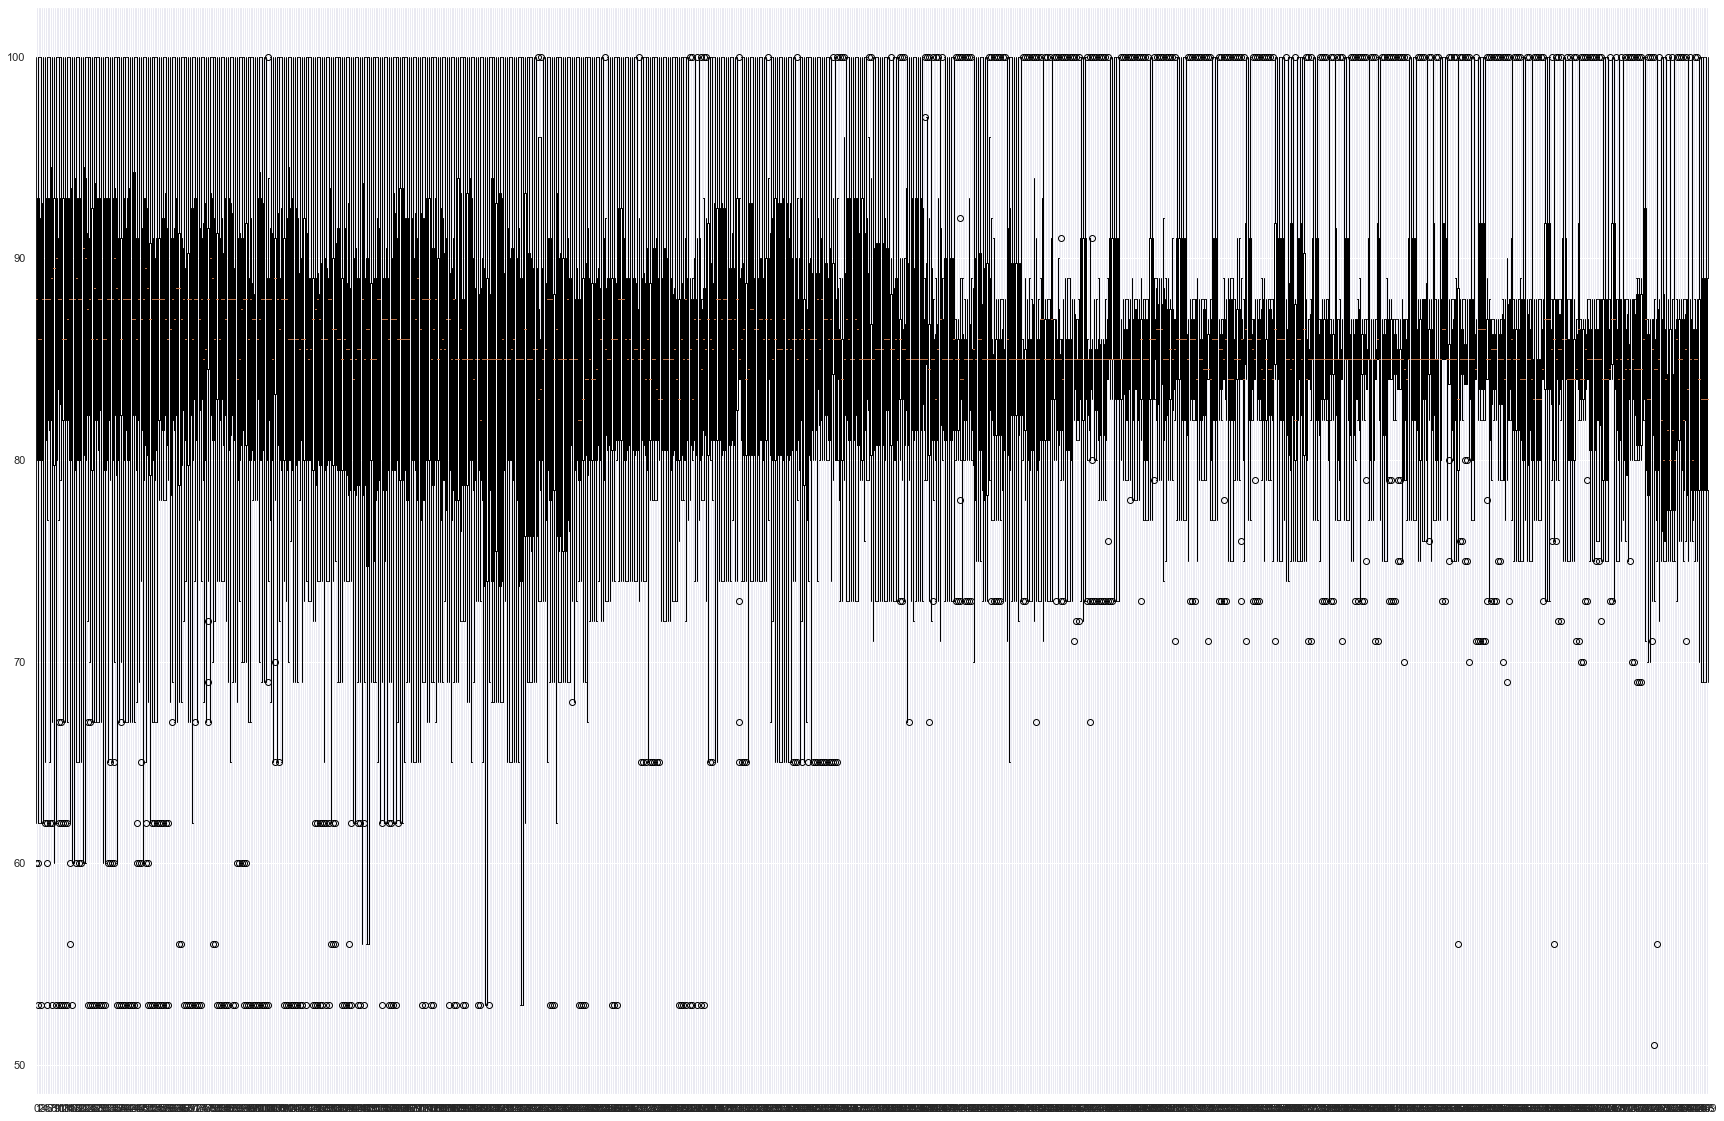

In [18]:
# Showing multiple boxplots on the same window
plt.boxplot((df["serie_diff_percent"]), sym="o", labels=df.index)
plt.show()

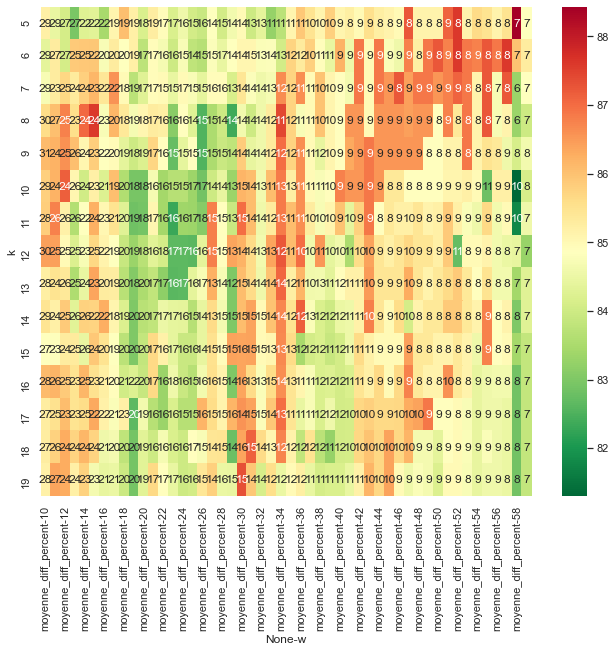

In [19]:
############################
# Create an heatmap with 4 dimensions
# To compare the results 
# number of sections and diff between the sections) with the variation og w and k parameterd
############################
df_heatmap = df[["w", "k", "moyenne_diff_percent"]]
df_heatmap_annot = df[["w", "k", "nb_sections"]].astype(float)


#print(df_heatmap)
#print(df_heatmap_annot)


df_heatmap = df_heatmap.groupby(['w', 'k']).mean()
#print(df_heatmap)
df_heatmap = df_heatmap.unstack(level=0)
#print(df_heatmap)

df_heatmap_annot = df_heatmap_annot.groupby(['w', 'k']).mean()
#print(df_heatmap_annot)
df_heatmap_annot = df_heatmap_annot.unstack(level=0)
#print(df_heatmap_annot)

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_heatmap, cmap ='RdYlGn_r', annot = df_heatmap_annot)
plt.show()

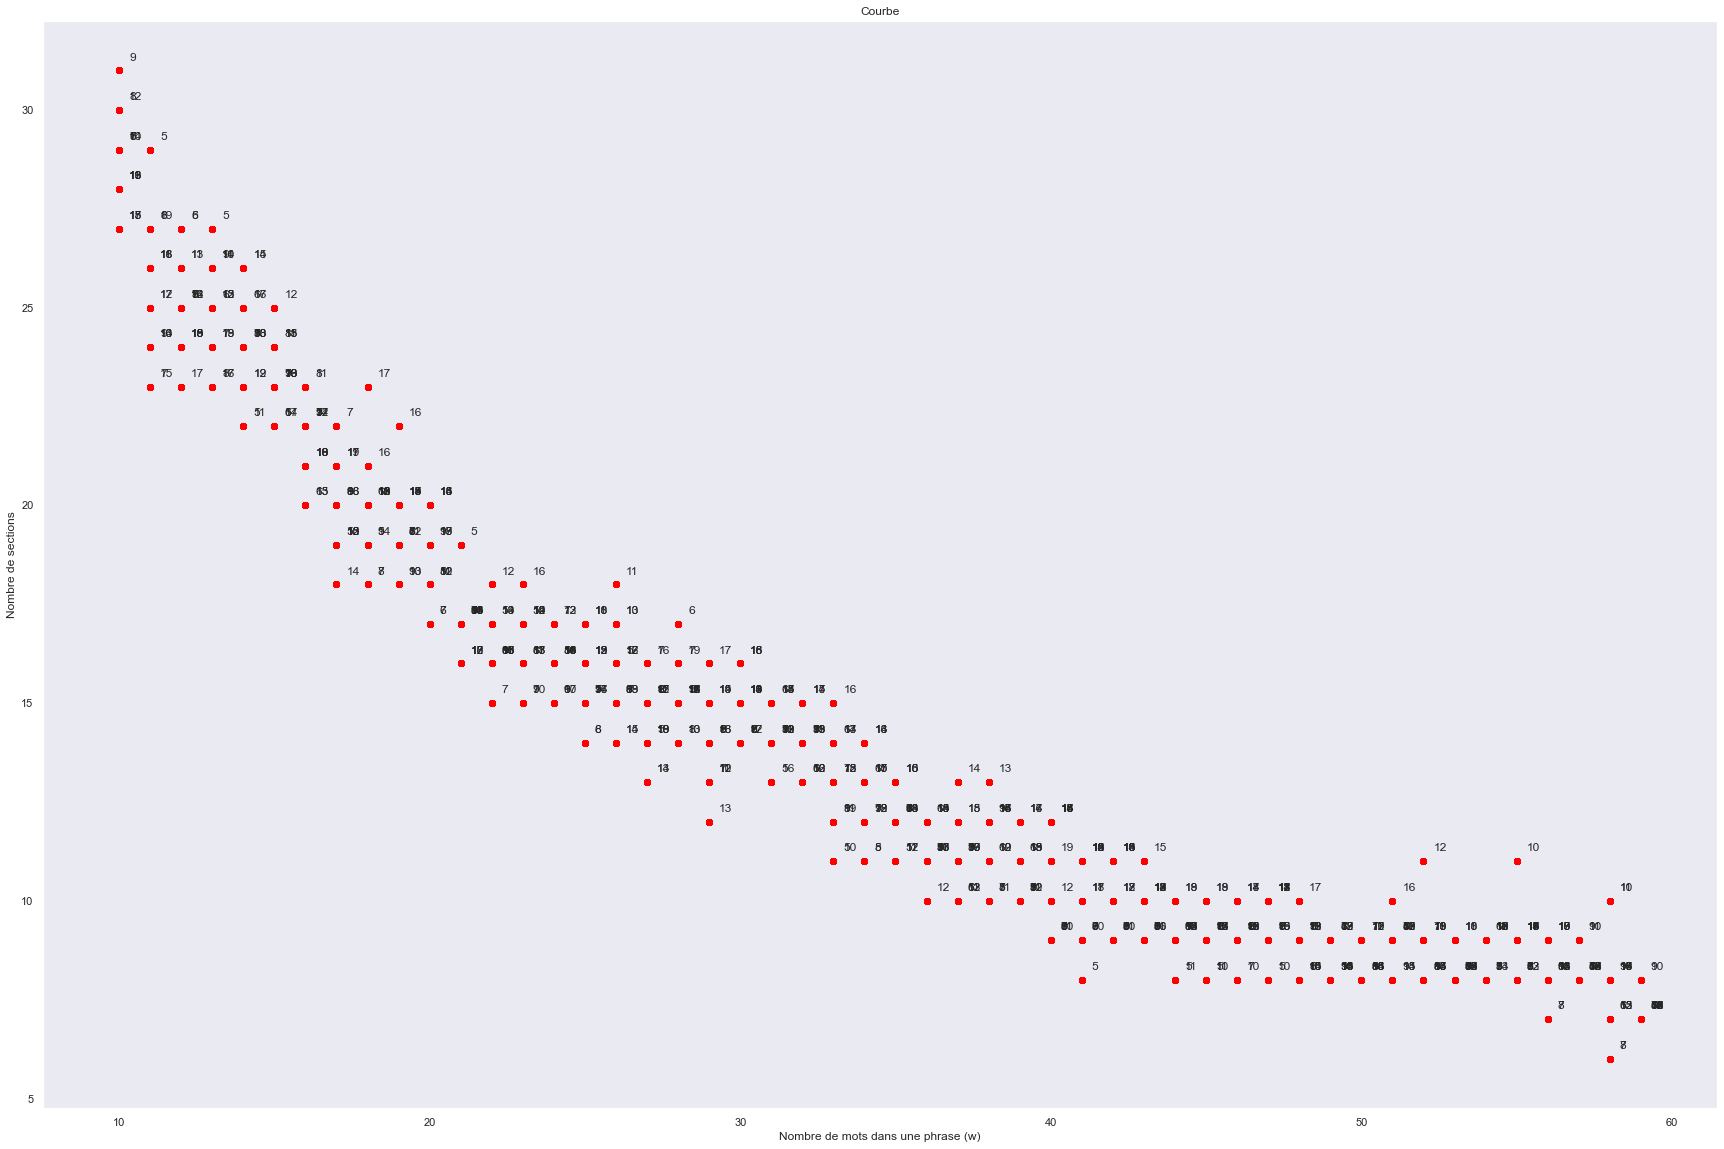

In [21]:
# Courbe
fig, ax = plt.subplots()
ax.scatter(df["w"], df["nb_sections"])

ax.set(xlabel='Nombre de mots dans une phrase (w)', ylabel='Nombre de sections',
       title='Courbe')
ax.grid()

for i, txt in enumerate(df["k"]):
    ax.annotate(txt, (df["w"][i], df["nb_sections"][i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(df["w"], df["nb_sections"], color='red')

In [22]:
#################
# Launch one simulation with defined w and k parameters
# The goal is to have lot of information about a specific simulation
#################
in_specific_w=58
in__specific_k=5

****** TEXT TILING with w= 58 and k= 5
[OK] Initialisation TextTiling
[OK] Téléchargement du document
[IN PROGRESS] Lancement de l'algorithme TextTiling
[OK] Algorithme TextTiling
Nombre de sections : 7



************************
Section n0
************************
Liste des mots différents avec la section précédente : 0
>Premiere word list, il n 'y a pas de comparaison avec la précédente
==== HISTOGRAMME DES OCCURENCES DES MOTS (section 0) ====
{'cost': 6, 'million': 5, 'saving': 4, 'agent': 4, 'usd': 3, 'fee': 3, 'implement': 3, 'new': 3, 'service': 3, 'fuel': 3, 'airline': 3, 'achieve': 2, 'charge': 2, 'little': 2, 'real': 2, '4': 2, 'programme': 2, 'european': 2, 'bsp': 2, 'target': 2}


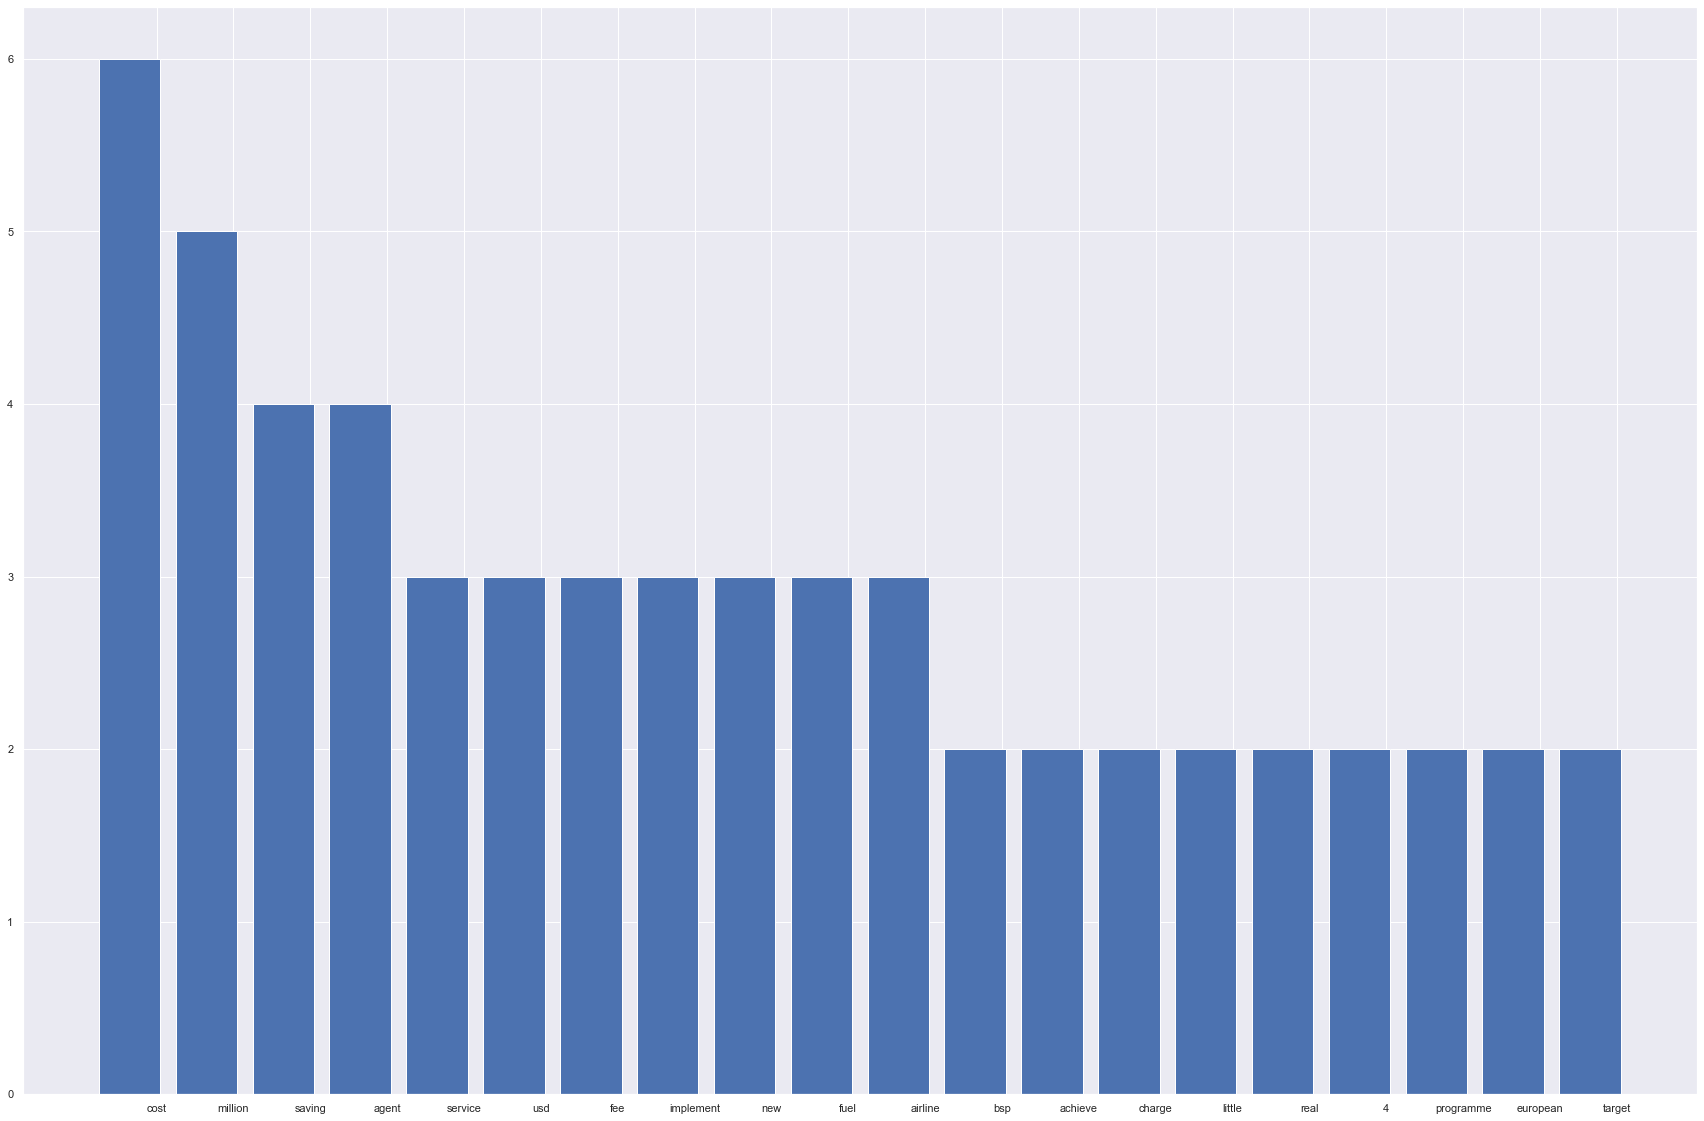

==== TEXT SECTION (section 0) ====
 Achieve savings/costs avoidance of USD 900 million in fees/charges, including at least USD 300 million in real cost reductions. Implement 4 new industry services/programmes (e.g. European BSP, audits, etc.) to reduce costs. Gain agreement on implementing target cost-efficiencies by the ten EUROCONTROL states with the greatest potential for savings. Develop a strategy for simplifying the business systems of network carriers, with initial priority on eliminating paper tickets and invoices. 	•	USD 844 million savings achieved through October in User Charges, of which USD 370 million is in real reductions •	USD 270 million savings in Fuel fees through October   •	A new Travel Agent Service Fee programme has been well received by agents and airlines as a means to assist agents process their charges to travellers •	WebLink is now offered to assist airlines collect web sales processes through travel agent outlets •	A new fuel hedging settlement mechanism is

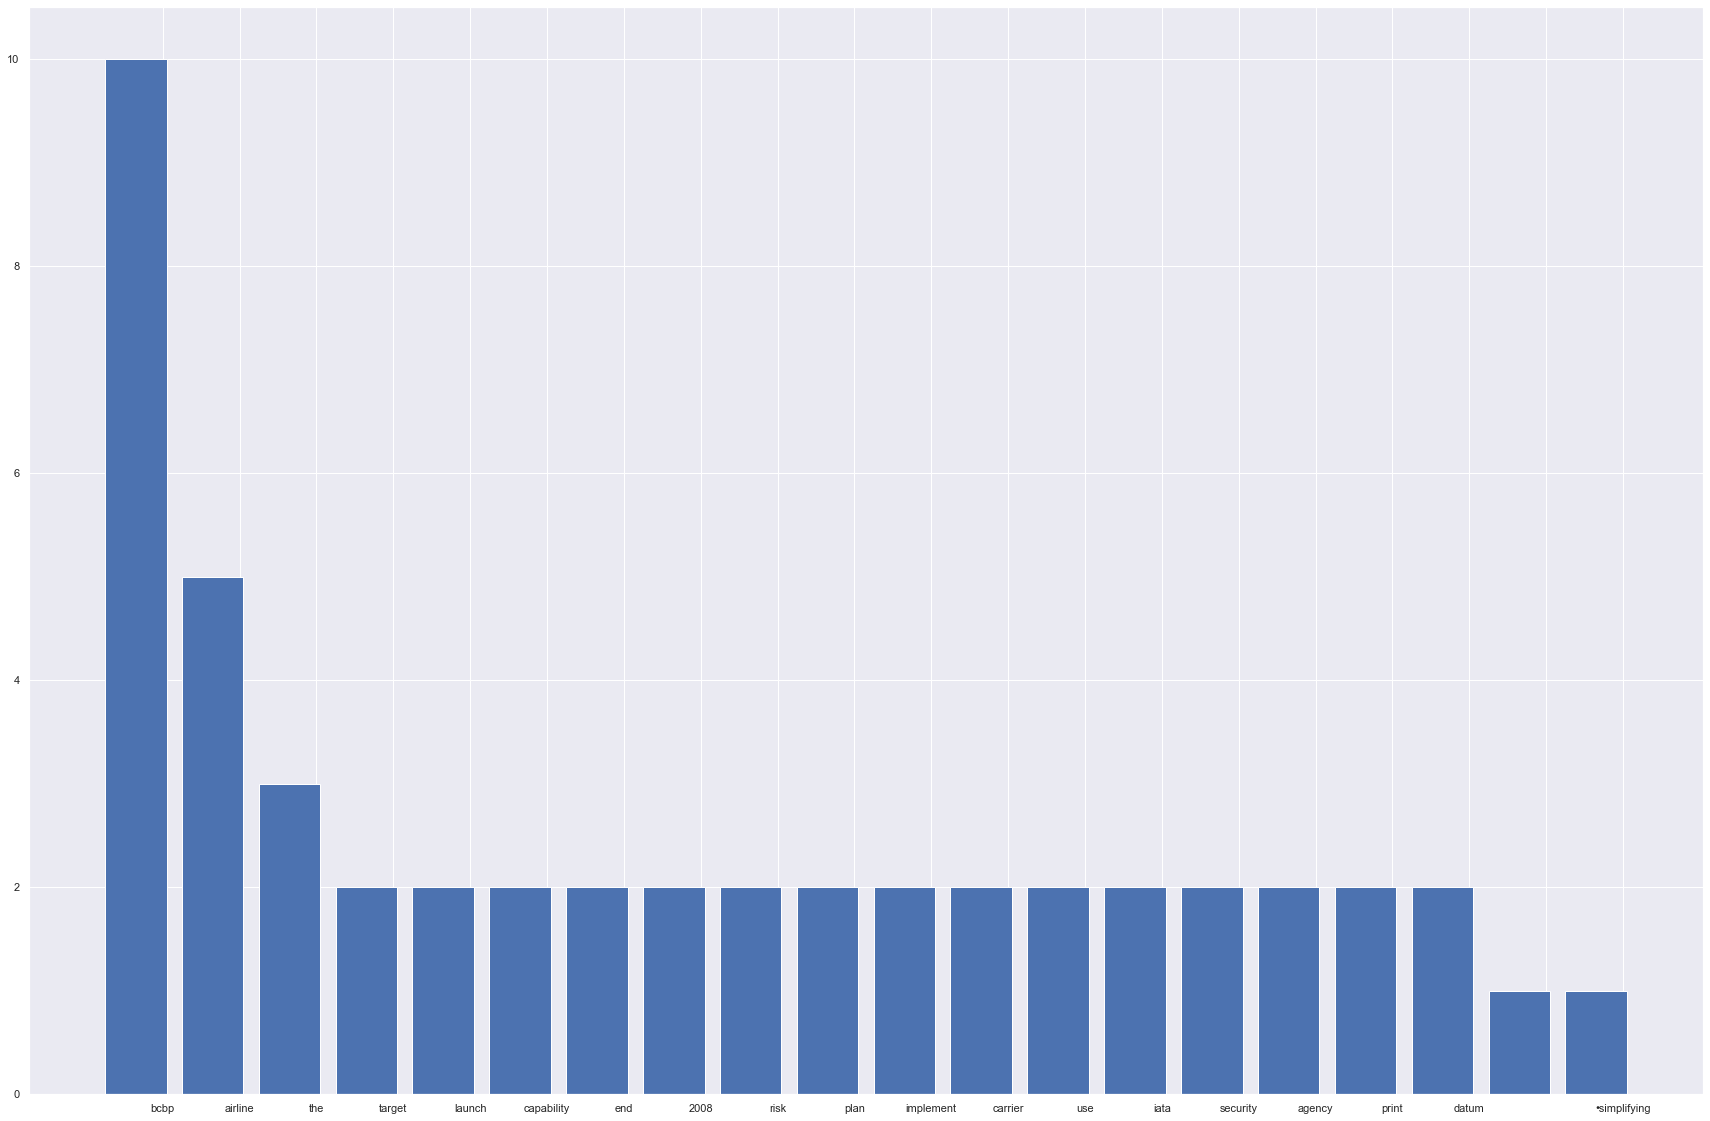

==== TEXT SECTION (section 1) ====
   •	Simplifying the Business programme launched with 4 sub-projects •	An additional project on removing paper from cargo processes proposed to BG/180  1.	There were 116 airlines offering BCBP capability at the end of April 2008. The current forecast for end 2008 is 175 airlines, putting at risk the target of 200. The airlines with no plan to implement BCBP are either carriers that use 1D Bar Code or small carriers that are busy implementing ET. IATA will continue to mobilise these airlines and support them to speed-up their plans.  2.	To achieve the 2010 target of 100% BCBP utilisation, IATA has launched the BCBP Matchmaker to enable airlines and airports to exchange BCBP capability and rollout plan information.  3.	After three years of using BCBP around the world, two security agencies have raised a concern on the validity of home-printed BCBP compared to airport- printed BCBP.   4.	In the U.S., the Transport Security Agency (TSA) is piloting with C

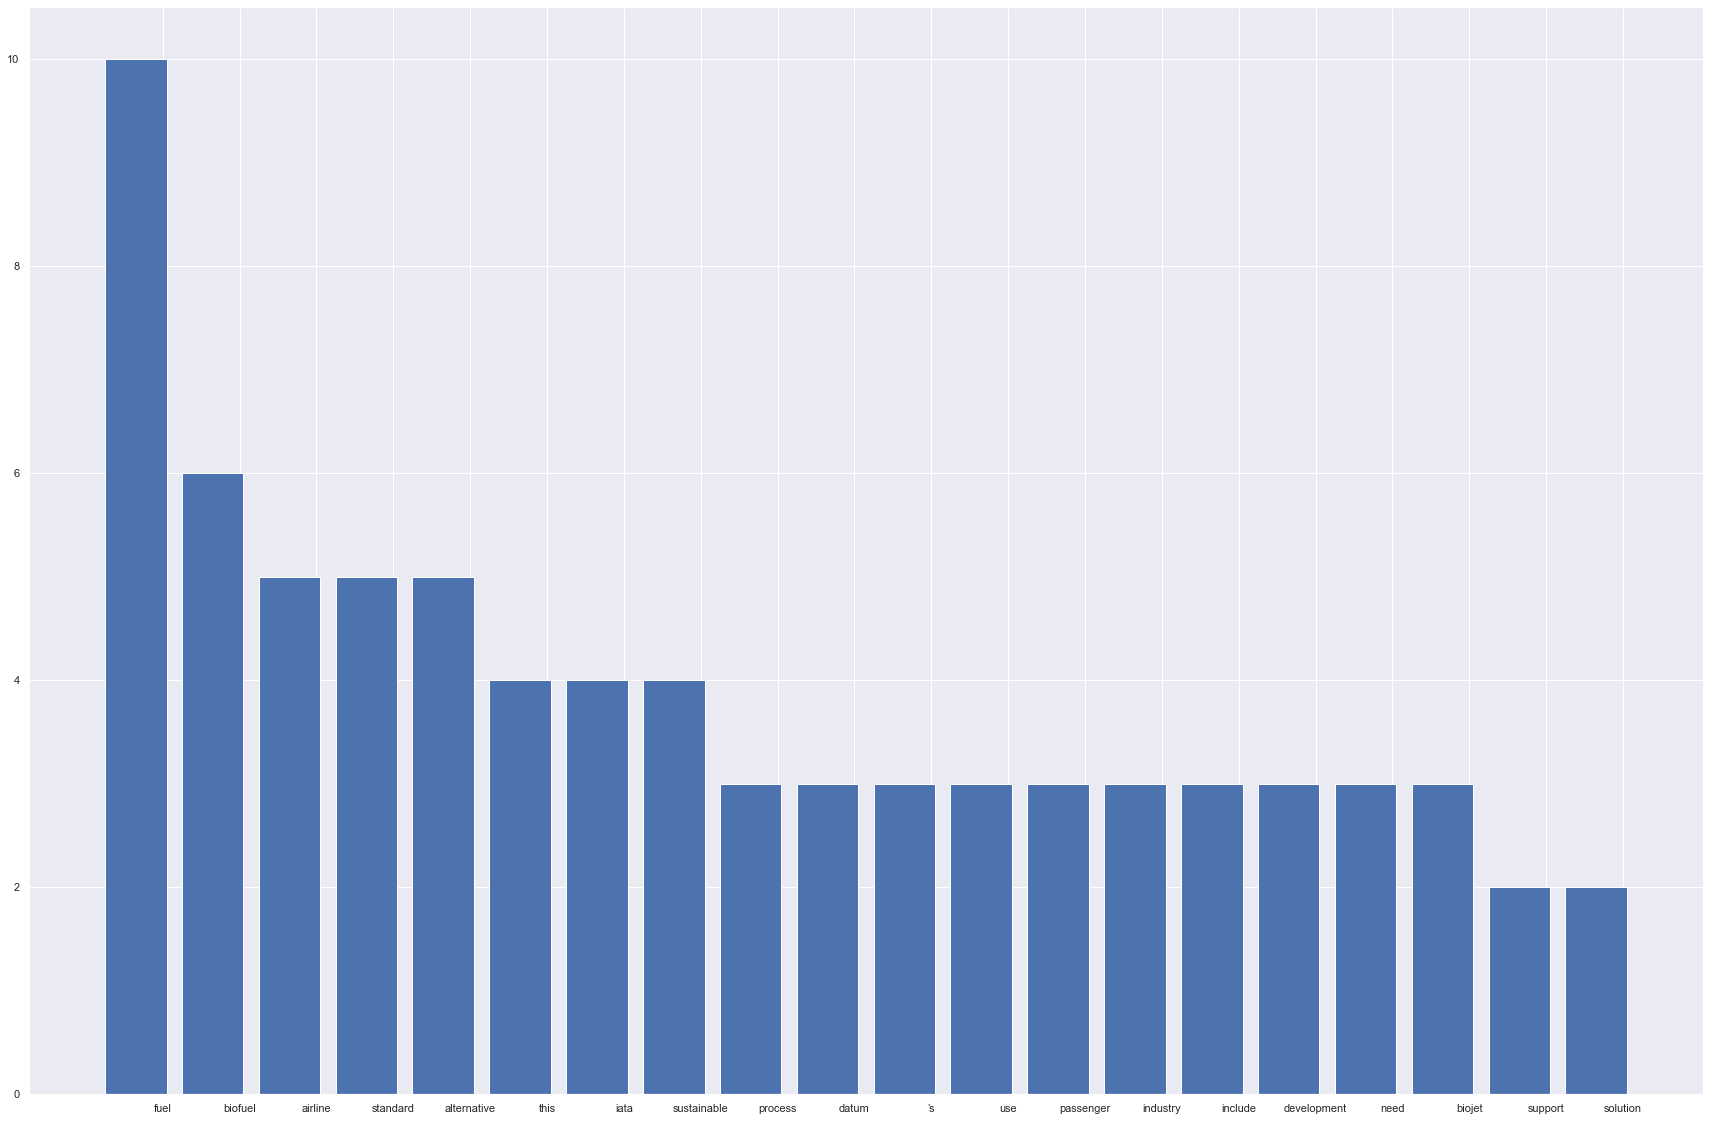

==== TEXT SECTION (section 2) ====
  5.	In the UK, the Department for Transport (DfT) supports the solution in place at Heathrow T5, which involves security representatives scanning the BCBP at the entrance to security. This process checks the bar code data against the airline’s departure control system and results in red or green light to proceed. This approach has the merit of using the airline’s existing data repository to validate the passenger data, as is done in the passenger boarding process.  It would therefore not require any changes to standards or major investment by airlines.  In addition, this process enables airlines to know which of their passengers who checked in via the Web have actually arrived at the airport, improving the management of their standby lists.  6.	Both alternatives will be discussed in the months leading up to the October 2008 PSC with the objective of defining a single industry approach and a standard to support it.   1.	BG/189 in June 2009 requested t

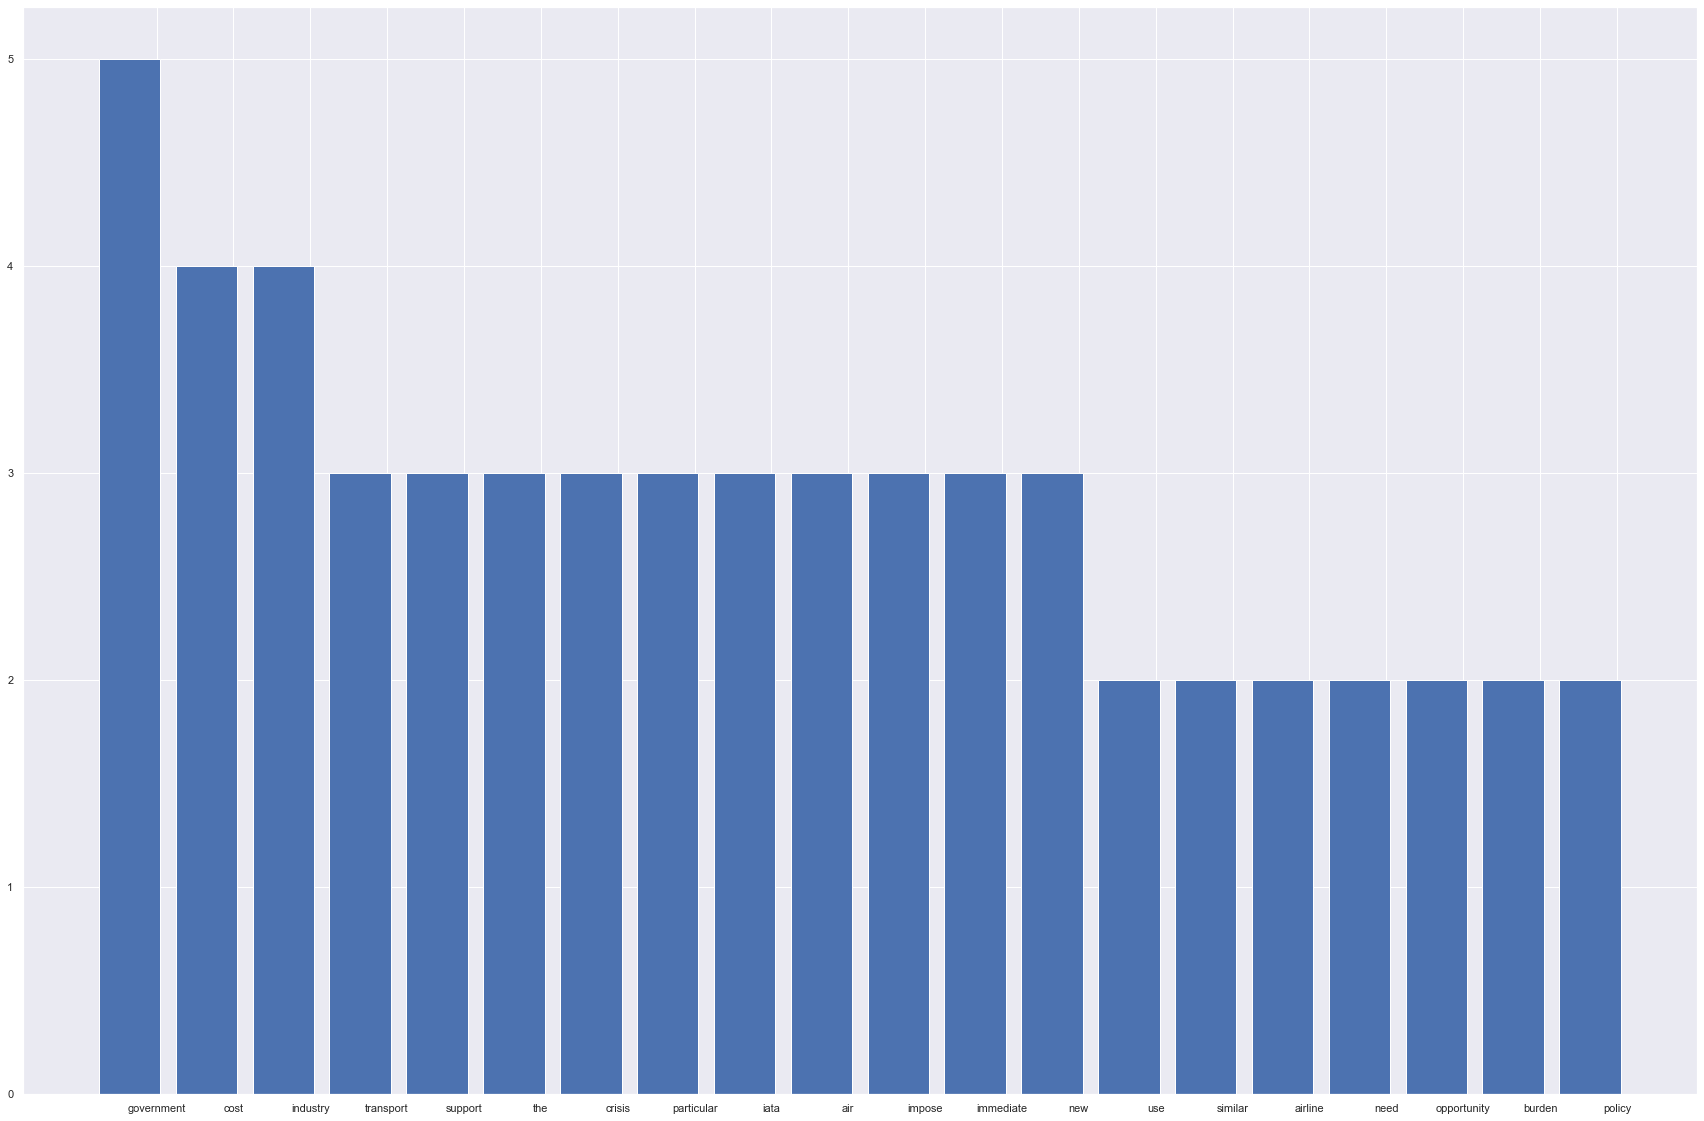

==== TEXT SECTION (section 3) ====
  6.	As explained in Attachment A, government support will be necessary in the early stages, similar to the support given to the development and deployment of other renewable fuels. Technology mandates alone, without support for measures to bring down production costs, could end up unnecessarily raising costs for airlines and their customers. The World Bank and similar organizations should be encouraged to fund demonstration projects in developing countries. The industry will need to ensure governments act appropriately.  1.	The current crisis may well be an opportunity to challenge the regulatory burden faced by the airline industry.  2.	IATA has used every opportunity to send this message. In particular, IATA submitted a short policy paper on ‘crisis relief’ to EC Vice President Antonio Tajani, ahead of an informal meeting of European Transport Ministers in March; wrote an open letter to the Obama transition team on priorities in air transport polic

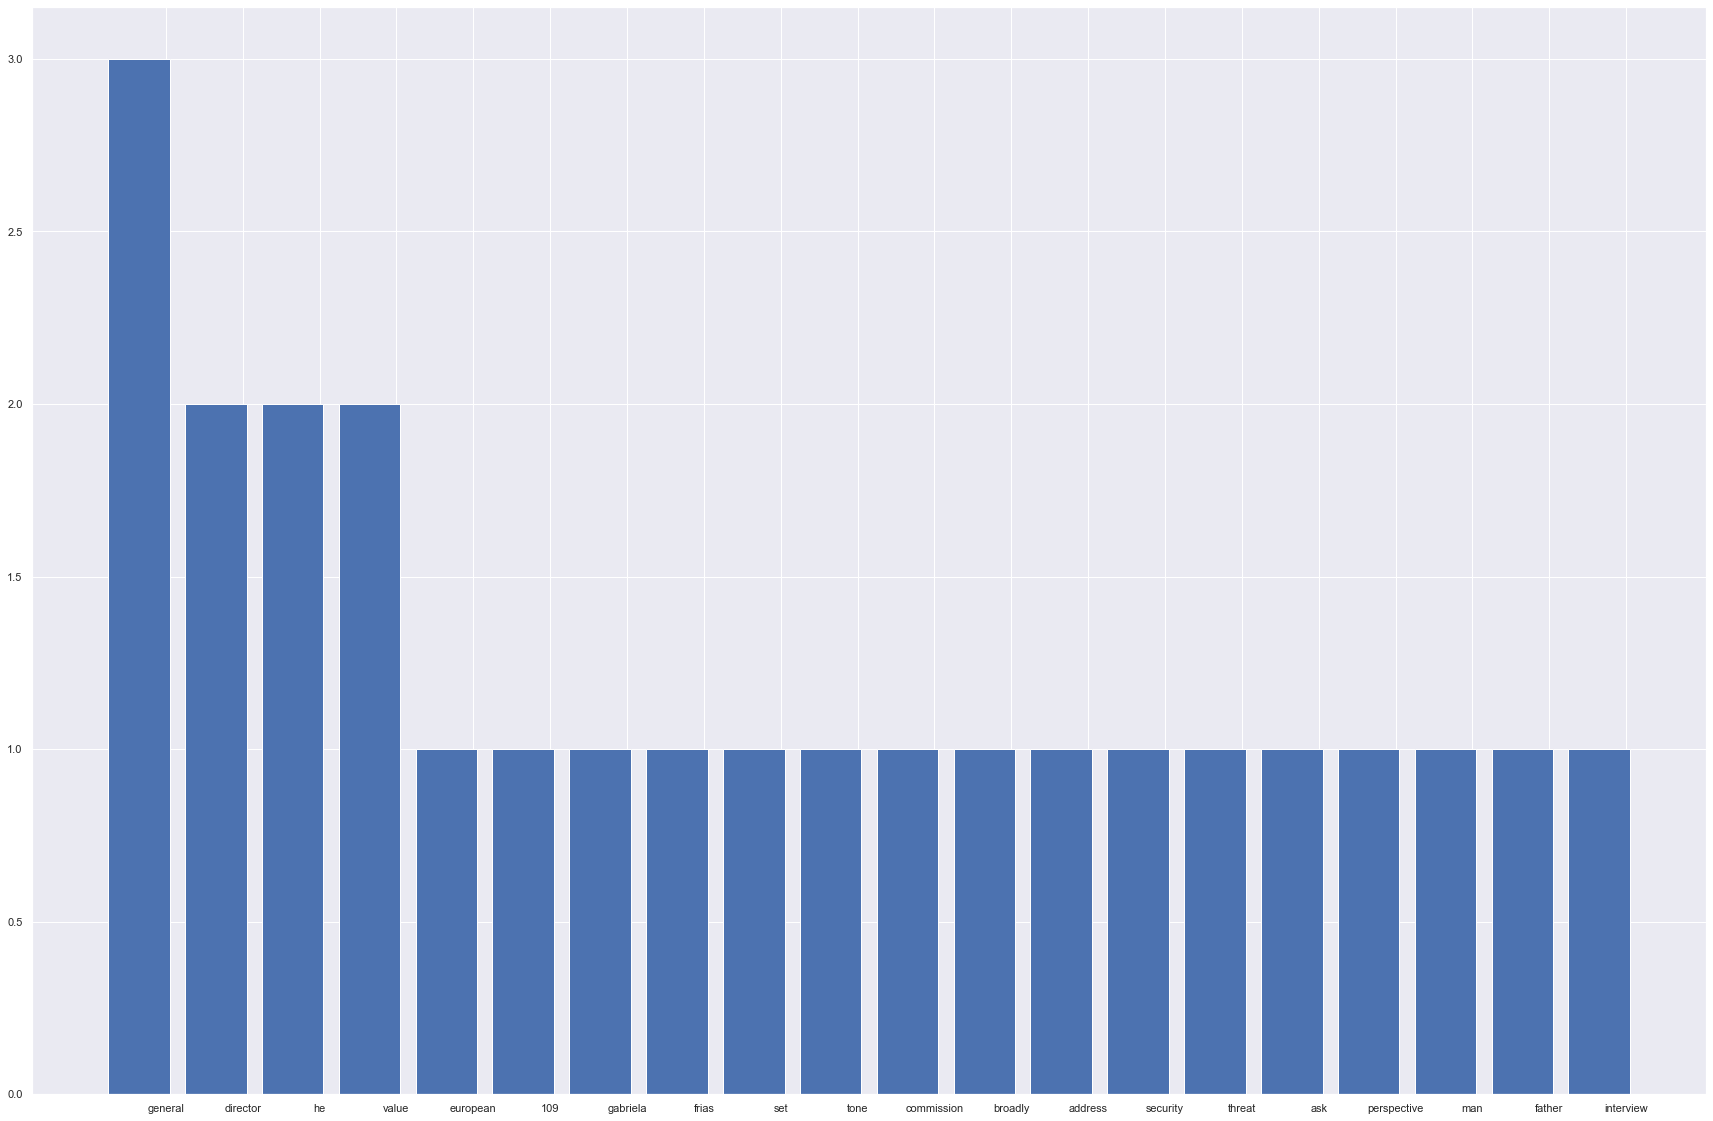

==== TEXT SECTION (section 4) ====
   109. Gabriela Frias set the tone of the interview by broadly addressing security threats in general  and asked for some perspectives as a man, father and the Director General at the European  Commission. Henrik Hololei expressed that his first thoughts are always about the victims and  families. He was very sad that there are such a large number of people who are inflicting  terror. Attempting to change the way we live and serve our values. We must say “no’ together,  stay tough and true to our values. He commented that as the Director General, “…I try to  protect our society and citizens”. Every time there is a loss of life to terrorism, he gathers his  staff for a minute of silence.



************************
Section n5
************************
Liste des mots différents avec la section précédente : 182
==== HISTOGRAMME DES OCCURENCES DES MOTS (section 5) ====
{'aviation': 13, 'security': 7, 'corsia': 7, '’s': 6, 'sector': 5, 'climate': 5, 'mr': 

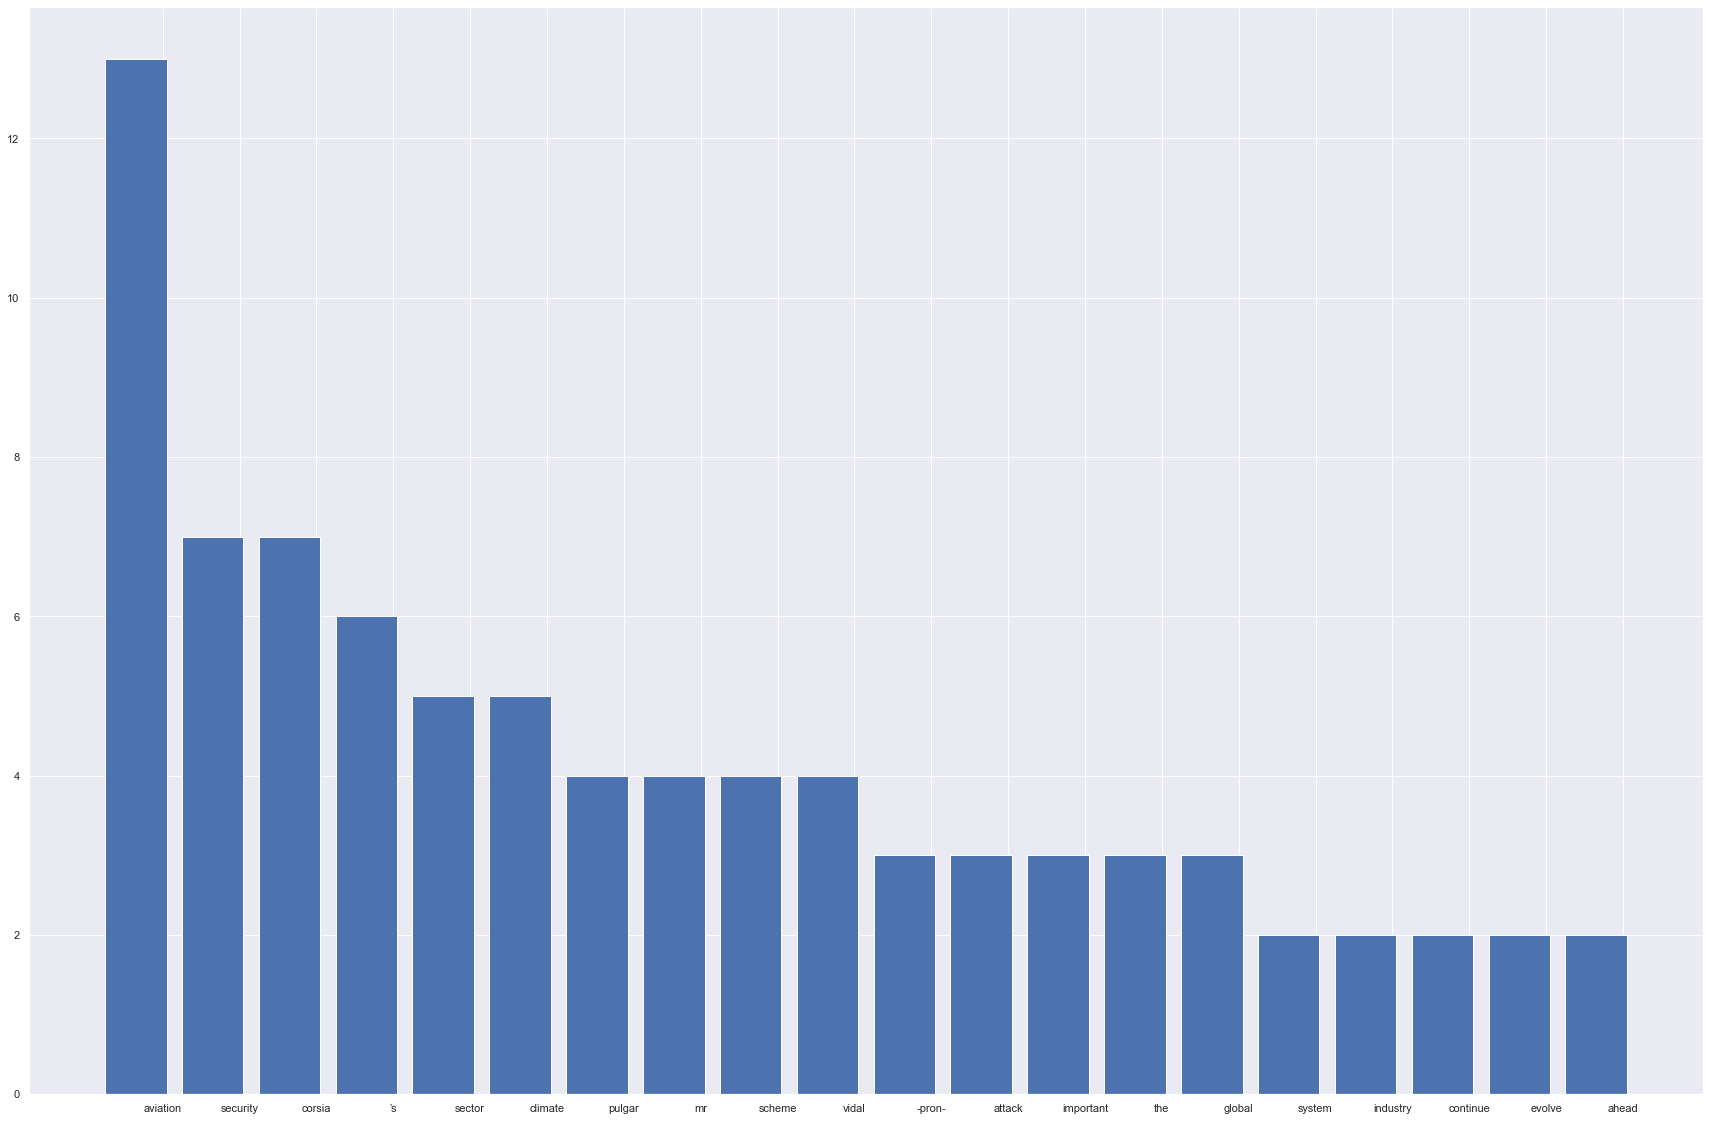

==== TEXT SECTION (section 5) ====
   110. Mr Hololei indicated work on these issues on a daily basis. EC is responsible for all transport  security, including aviation. For decades, civil aviation has been a target for terrorism. It’s not  something new, since the 1970s attacks against the industry have continued. Threats are  evolving constantly. It’s important for aviation security, and perhaps for any security system  that the aviation sector has been dynamic and seldom static in its approach – one step ahead  of the curve. Terrorists are deploying the use of both sophisticated and non-sophisticated  attack vectors which plays into the ever-evolving threat aspect. He continued to express that  it’s important to note that in the attacks against aviation none have breached the aviation  security perimeter which is covered by the rules of aviation security. Security of the landside  area has become an urgent focus. The security of landside needs to be considered in the  context of air

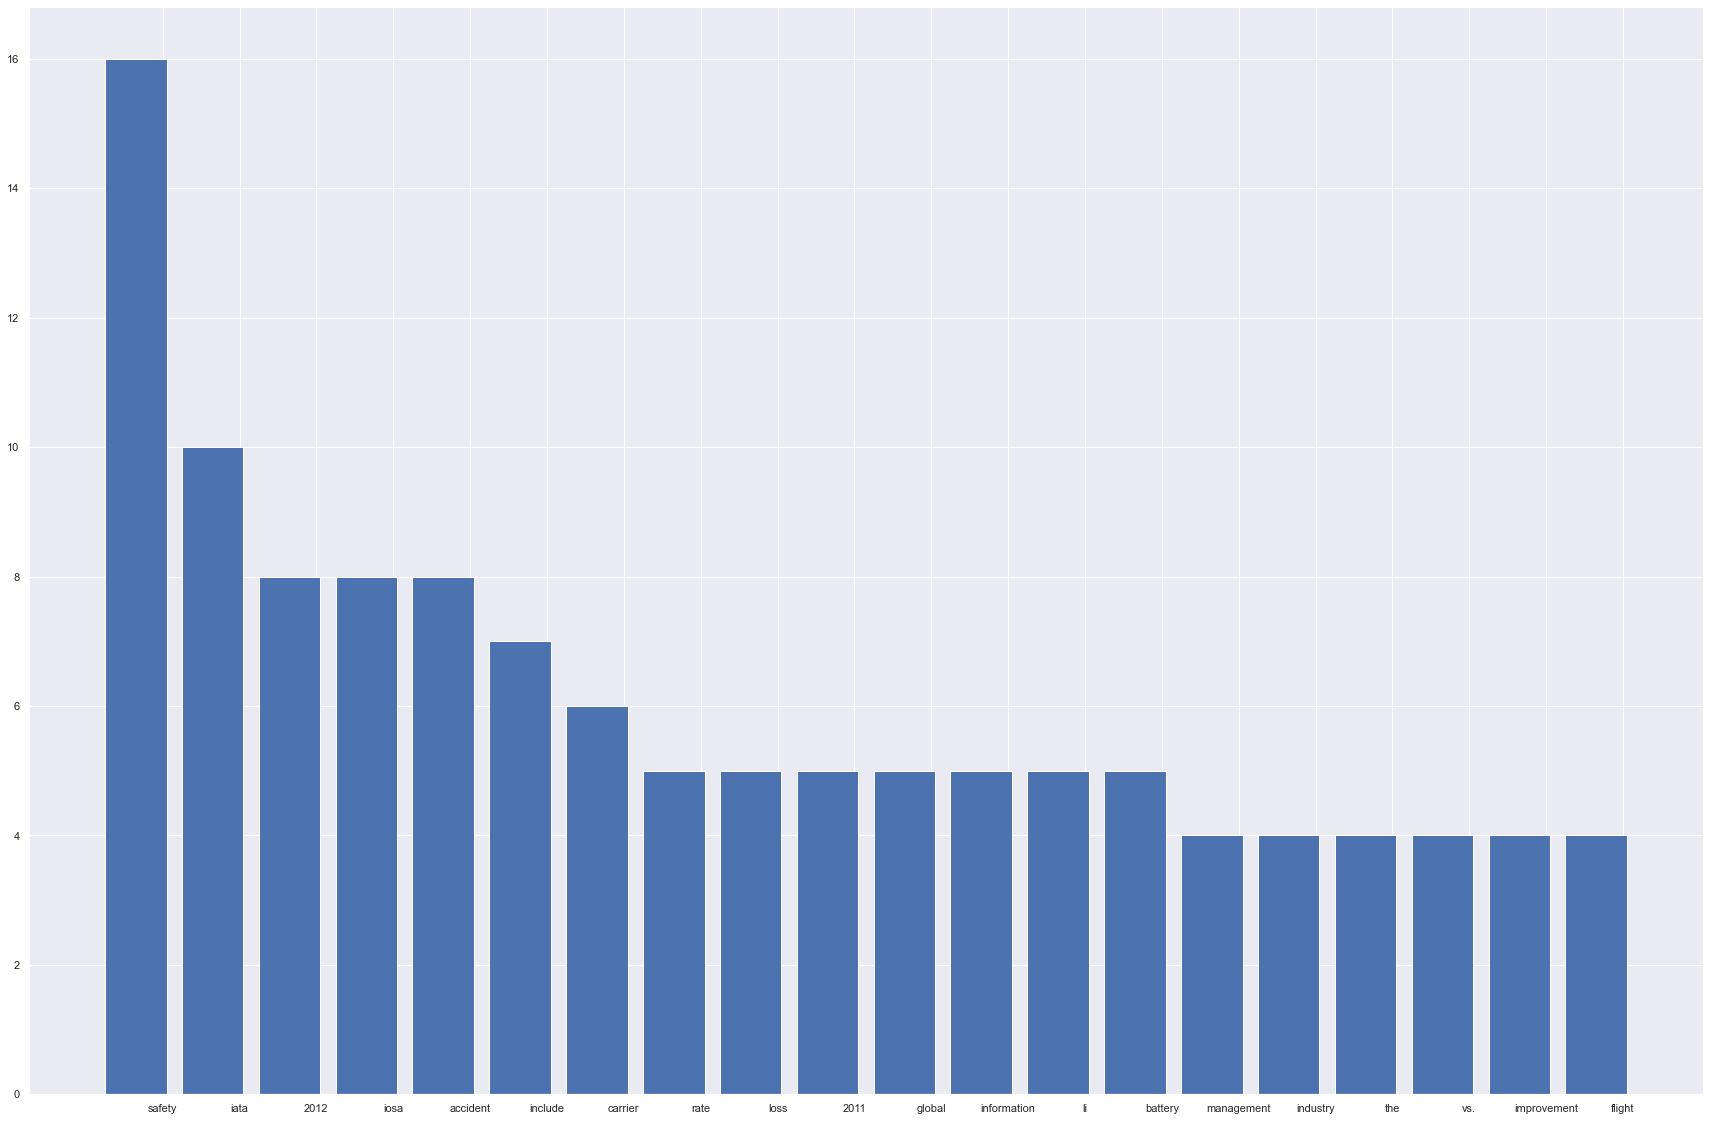

==== TEXT SECTION (section 6) ====
   122. He was keen to underline a sense of urgency. He congratulated the aviation sector again on  what had been achieved but urged even greater ambition in the future.   123. Finally, Mr Pulgar-Vidal pledged WWF’s support as a partner to the aviation industry in  enhancing external outreach, providing science-based evidence to back up policy discussions  and expertise on the definition of offsetting standards, as well as communicating aviation’s  success story on climate action to a broader audience.   SAFETY PERFORMANCE 2012 (as at 31 October 2012)  1.	The industry experienced four Western-built jet hull losses during 2012, compared to 11 at the same time last year. The hull loss rate for IATA member airlines is zero (vs. 0.71 in 2011), while the global rate is 0.21 (vs. 0.47 in 2011). Industry improvement in this category is 55%.  Western-built Jet Hull Loss Rate (as at 31 October 2012)   IOSA vs Non-IOSA Carrier All Accident Performance  (as at 3

In [23]:
#################
# Launch one simulation with defined w and k parameters
# The goal is to have lot of information about a specific simulation
#################
data_save = []
#print("*************************************")
print("****** TEXT TILING with w= "+str(in_specific_w)+" and k= "+str(in__specific_k))
#print("*************************************")

ttt = TextTilingTokenizer(w=in_specific_w, k=in__specific_k)
print("[OK] Initialisation TextTiling")
text_blob = download_file()
print("[OK] Téléchargement du document")
print("[IN PROGRESS] Lancement de l'algorithme TextTiling")
tokens = ttt.tokenize(text_blob)
print("[OK] Algorithme TextTiling")
print("Nombre de sections : "+str(len(tokens)))
data_save.append(len(tokens))

coverage_words_before= []

for i in range(len(tokens)):
    print("\n\n")
    print("************************")
    print("Section n"+str(i))
    print("************************")
    word_list = create_token_list(tokens[i])
    word_list_filtered = remove_stopwords(word_list)
    
    if i>0:
        word_list_before = create_token_list(tokens[i-1])
        word_list_before_filtered = remove_stopwords(word_list_before)

    #print("==== BEGIN DIFFERENCE WORD (section "+str(i)+")====")
    list_diff_words_with_before_sentence = []

    for key in word_list_filtered.keys(): 
        if i>0:
            if not key in word_list_before_filtered: 
                list_diff_words_with_before_sentence.append(key)            

    print("Liste des mots différents avec la section précédente : "+str(len(list_diff_words_with_before_sentence)))
    if i>0:
        list_diff_words_with_before_sentence.sort()
        coverage_before = round(len(list_diff_words_with_before_sentence)/len(word_list_filtered)*100)
        coverage_words_before.append(coverage_before)
        #print("Distinction avec section précédente : ", str(coverage_before)+"%")
        #print(list_diff_words_with_before_sentence) 
    else:
        print(">Premiere word list, il n 'y a pas de comparaison avec la précédente")
        coverage_words_before.append(100)

    #print("==== END DIFFERENCE WORD ====")

    #print("==== WORD LIST SORTED (section "+str(i)+") ====")
    #print("Nombre de mots dans la section : "+str(len(word_list_filtered))+" (Nombre de mots sans filtrage : "+str(len(word_list))+")")
    #print(sorted(word_list_filtered.items(), key=lambda t: t[0]))
    #print("\n") 
    print("==== HISTOGRAMME DES OCCURENCES DES MOTS (section "+str(i)+") ====") 
    counts = Counter(word_list_filtered)
    counts_most_commun = dict(Counter(word_list_filtered).most_common(20))
    print(counts_most_commun)
    labels, values = zip(*counts_most_commun.items())

    #sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange your data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    indexes = np.arange(len(labels))

    bar_width = 0.35

    plt.bar(indexes, values)

    # add labels
    plt.xticks(indexes + bar_width, labels)
    plt.show()
    
    
    paragraph = tokens[i].replace("\n", " ")
    print("==== TEXT SECTION (section "+str(i)+") ====")
    print(paragraph)
            

Nombre de sections : 
7
Moyenne des pourcentages de différence : 
88.43
Ecart type des différences entre chaque section : 
6.32
Série des différences (en %) entre chaque section : 
[100, 84, 86, 82, 91, 94, 82]


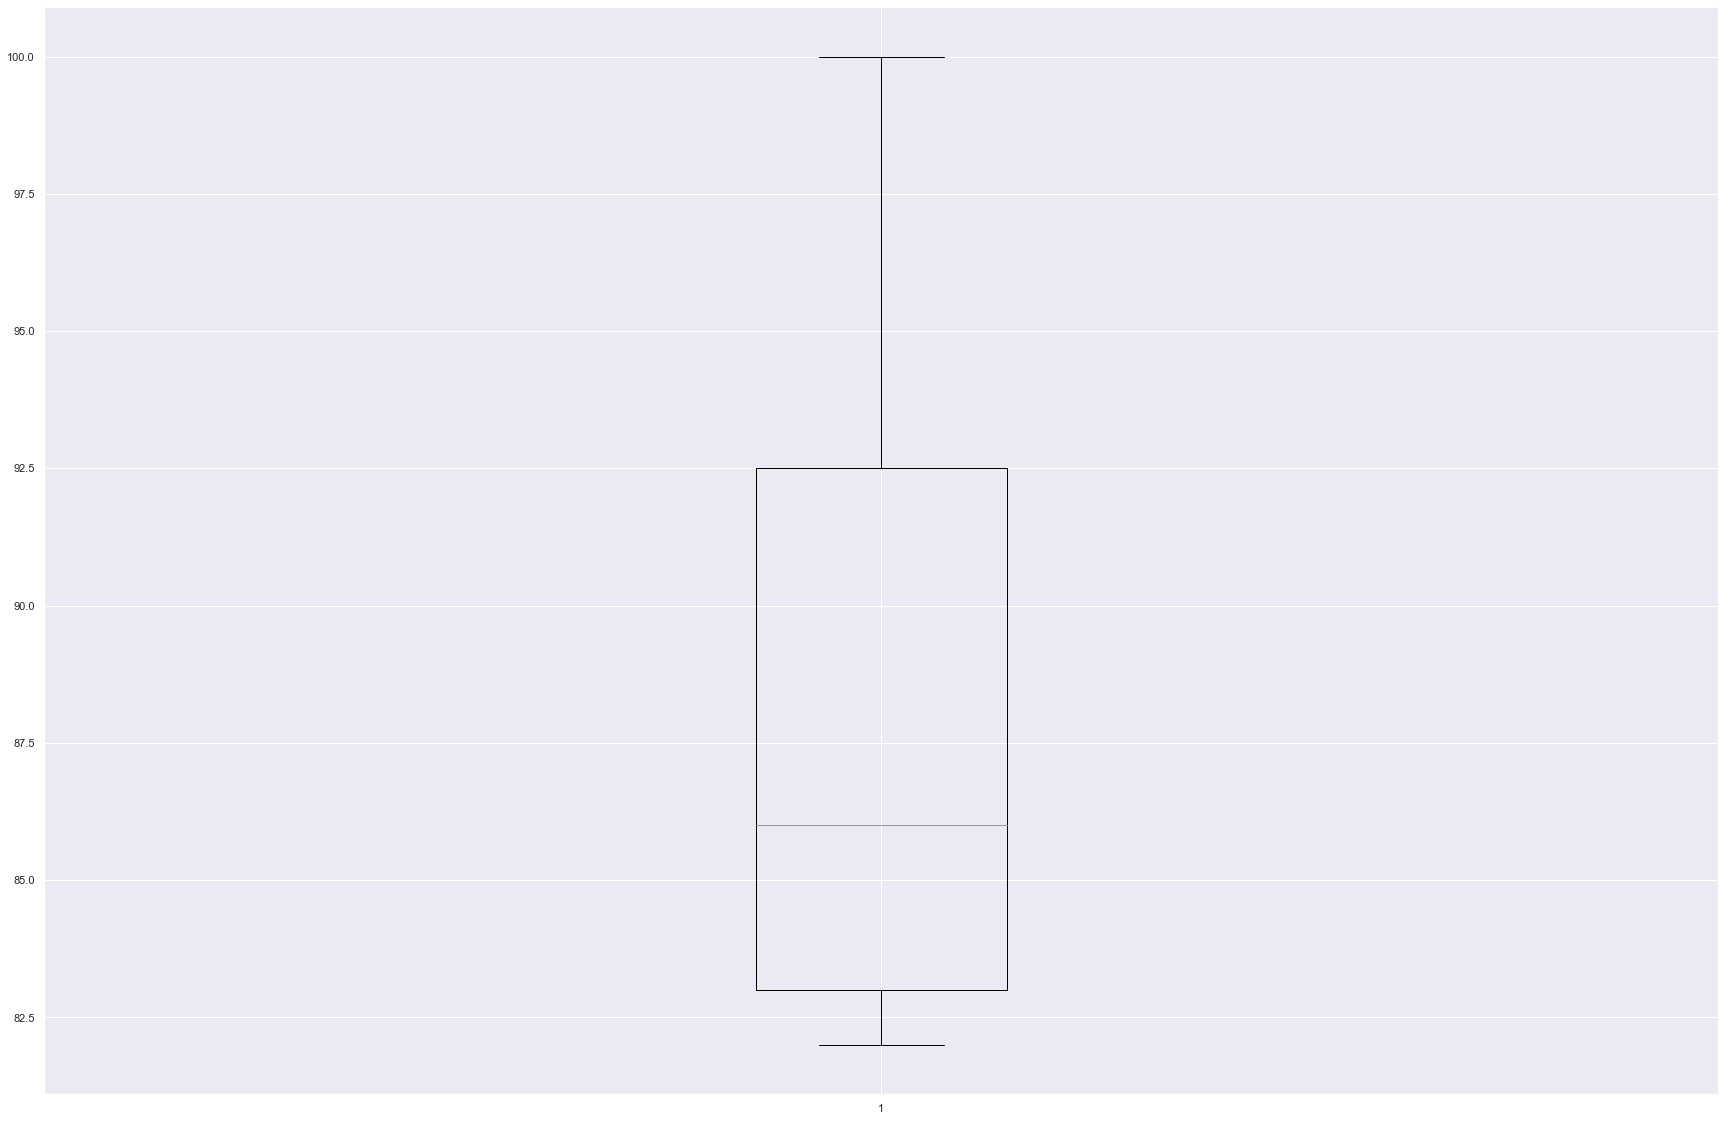

In [24]:
#####################
# STATISTIQUES SUPPLEMENTAIRES SUR LA SIMULATION SPECIFIQUE
#####################
print("Nombre de sections : ") 
print(len(coverage_words_before))
print("Moyenne des pourcentages de différence : ") 
print(round(mean(coverage_words_before),2))
print("Ecart type des différences entre chaque section : ") 
print(round(np.std(coverage_words_before),2))
print("Série des différences (en %) entre chaque section : ") 
print(coverage_words_before)

# Creating plot 
plt.boxplot(coverage_words_before) 
# Two subplots, unpack the axes array immediately
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#ax1.plot(x, y)
#ax1.set_title('Sharing Y axis')
#ax2.scatter(x, y)
# show plot 
plt.show() 

In [25]:
#################
# Launch one simulation with defined w and k parameters
# The goal is to have lot of information about a specific simulation
#################
#print("*************************************")
print("****** TEXT TILING with w= "+str(in_specific_w)+" and k= "+str(in__specific_k))
#print("*************************************")
i=0
ttt = TextTilingTokenizer(w=in_specific_w, k=in__specific_k, demo_mode=True)
text_blob = download_file()
s, ss, d, b = ttt.tokenize(text_blob)
print("Nombre de segment boundaries :" + str(b.count(1)))
print("Nombre de -gap_scores : "+str(len(s)))

print("Inc Segment boudaries - Depth scores - smooth scores - gap scores ")
while i < len(b):
    print(str(i)+" - "+str(b[i])+ " - "+str(d[i])+ " - "+str(ss[i])+" - "+str(s[i]))
    i +=1
                                    
print("gap_scores : ") 
print(s)
print("----------------")
print(" smooth_scores : ") 
print(ss) 
print("----------------")
print(" depth_scores: ") 
print(d) 
print("----------------")
print("segment_boundaries: ")
print(b)


****** TEXT TILING with w= 58 and k= 5
Nombre de segment boundaries :6
Nombre de -gap_scores : 41
Inc Segment boudaries - Depth scores - smooth scores - gap scores 
0 - 0 - 0 - 0.33066970644947025 - 0.3188870512307548
1 - 0 - 0 - 0.23375744675591847 - 0.20886662734657357
2 - 0 - 0 - 0.1664501425518055 - 0.17351866169042715
3 - 0 - 0 - 0.17459877155652725 - 0.11696513861841575
4 - 1 - 0.029300533585915278 - 0.21932877097728906 - 0.23331251436073885
5 - 0 - 0.0 - 0.24862930456320437 - 0.3077086599527126
6 - 0 - 0.035244510789747496 - 0.21338479377345687 - 0.20486673937616168
7 - 0 - 0.11294441112252634 - 0.13568489344067805 - 0.12757898199149628
8 - 1 - 0.2485410001930805 - 0.12994281268086075 - 0.0746089589543762
9 - 0 - 0.07966240022154536 - 0.18013492077005222 - 0.18764049709670982
10 - 0 - 0.011196920891784146 - 0.24860040009981343 - 0.27815530625907064
11 - 0 - 0.0 - 0.2597973209915976 - 0.2800053969436599
12 - 0 - 0.04659409626154287 - 0.2132032247300547 - 0.22123125977206226
13 - 

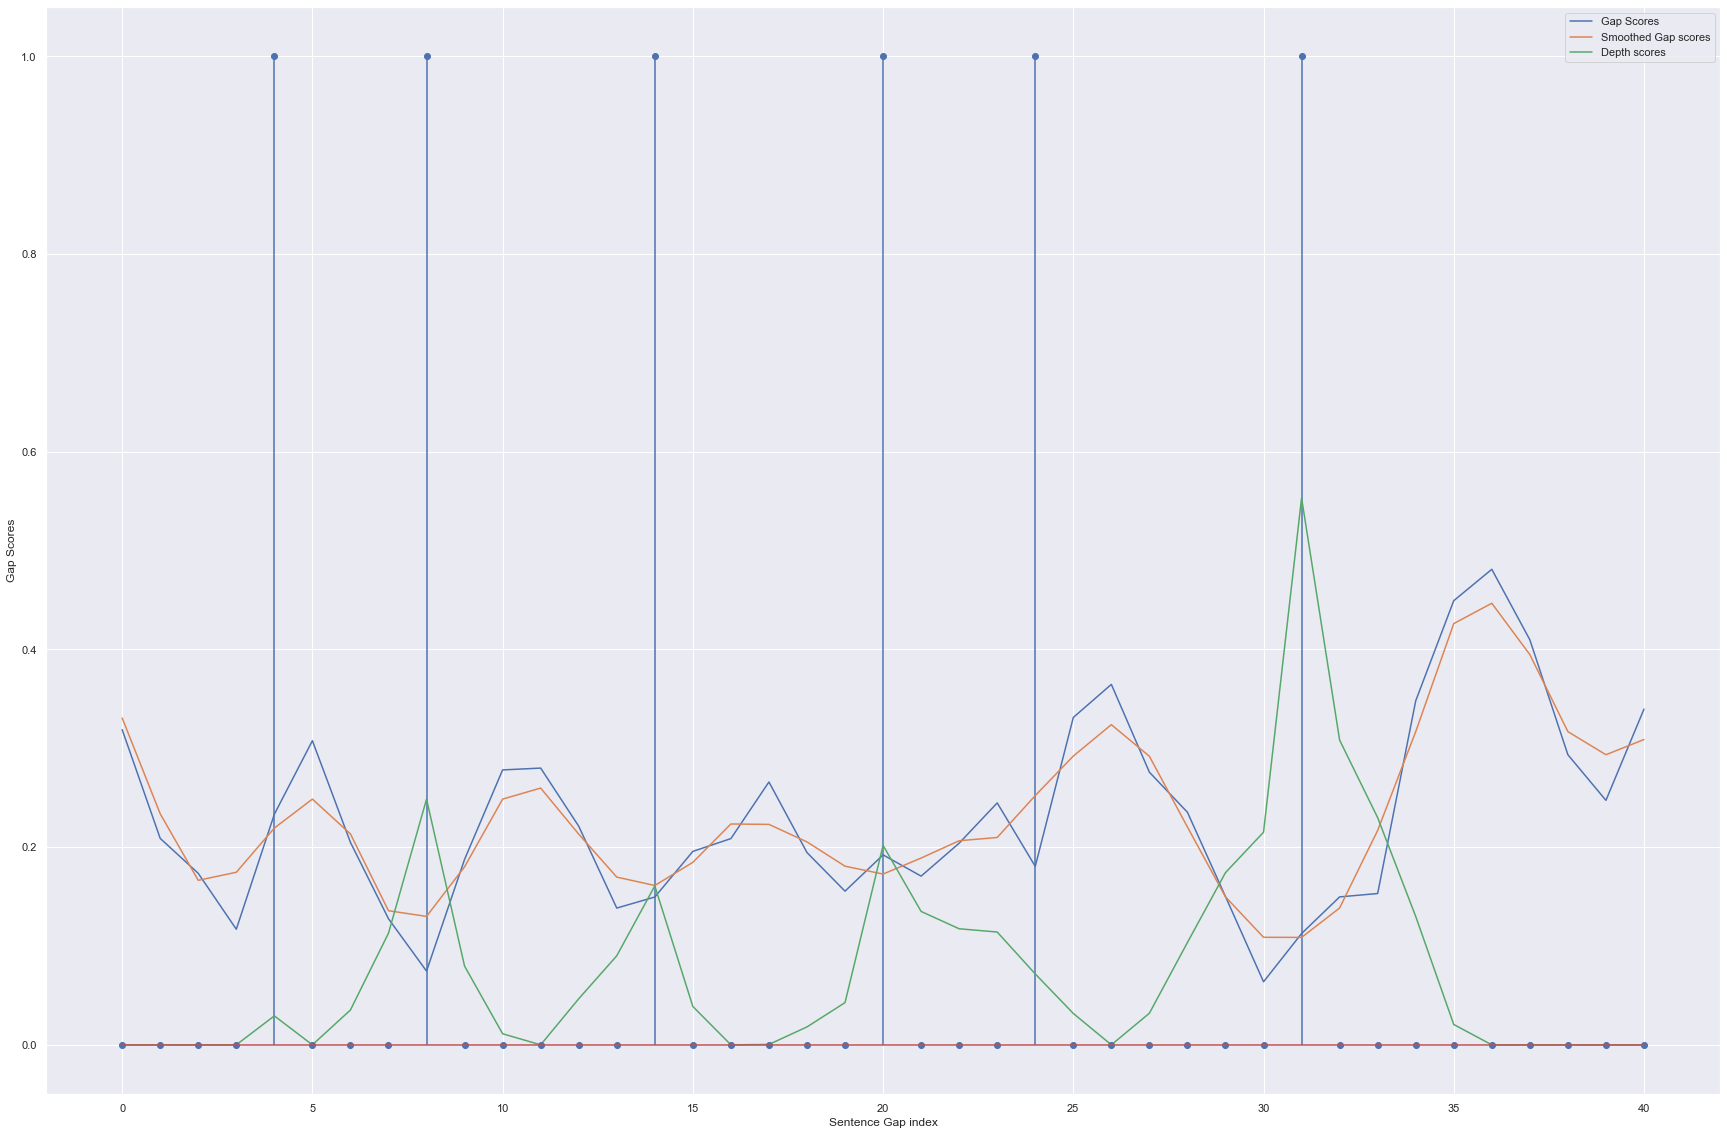

In [26]:
#####################
# STATISTIQUES SUPPLEMENTAIRES SUR LA SIMULATION SPECIFIQUE
#####################
pylab.xlabel("Sentence Gap index")
pylab.ylabel("Gap Scores")
pylab.plot(range(len(s)), s, label="Gap Scores")
pylab.plot(range(len(ss)), ss, label="Smoothed Gap scores")
pylab.plot(range(len(d)), d, label="Depth scores")
pylab.stem(range(len(b)), b)
pylab.legend()
pylab.show() 

In [ ]:
ttt = TextTilingTokenizer(w=29, k=6, demo_mode=True)
text_blob = download_file()
s, ss, d, b = ttt.tokenize(text_blob)
pylab.xlabel("Sentence Gap index")
pylab.ylabel("Gap Scores")
pylab.plot(range(len(s)), s, label="Gap Scores")
pylab.plot(range(len(ss)), ss, label="Smoothed Gap scores")
pylab.plot(range(len(d)), d, label="Depth scores")
pylab.stem(range(len(b)), b)
pylab.legend()
pylab.show()

In [ ]:
ttt = TextTilingTokenizer(w=20, k=20)
text_blob = download_file()
tokens = ttt.tokenize(text_blob)
for token in tokens:
    paragraph = token.replace("\n", " ")
    print(paragraph)
    print("\n ******\n") 